In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Inference in Directed Graphical Models

Having established how to represent a probabilistic model using a directed graphical model and extract its joint distribution (Section 8.5.1), as well as how to determine conditional independence via d-separation (Section 8.5.2), we now turn our attention to *inference*. Inference in a graphical model involves computing probabilities of interest, such as marginal probabilities of a subset of variables or conditional probabilities given observed evidence. This process is critical for tasks like prediction, decision-making, and learning.

The joint distribution in a directed graphical model factorizes according to the graph structure, as given by

$$
p(\mathbf{x}) = \prod_{k=1}^K p(x_k | \text{Pa}_k), \tag{8.35}
$$

where $\text{Pa}_k$ denotes the parents of node $x_k$ (Equation 8.31). Inference typically involves summing or integrating over variables to compute marginals or conditionals. For example, to compute the marginal probability of a variable $x_i$, we sum over all other variables:

$$
p(x_i) = \sum_{\mathbf{x} \setminus x_i} p(\mathbf{x}), \tag{8.36}
$$

where $\mathbf{x} \setminus x_i$ denotes all variables in $\mathbf{x}$ except $x_i$. Similarly, if we observe evidence $\mathbf{e}$ (a set of variables with assigned values), we compute the conditional probability $p(x_i | \mathbf{e})$ by:

$$
p(x_i | \mathbf{e}) = \frac{p(x_i, \mathbf{e})}{p(\mathbf{e})}, \quad p(x_i, \mathbf{e}) = \sum_{\mathbf{x} \setminus \{x_i, \mathbf{e}\}} p(\mathbf{x}), \quad p(\mathbf{e}) = \sum_{\mathbf{x} \setminus \mathbf{e}} p(\mathbf{x}). \tag{8.37}
$$

### Challenges in Inference

Directly applying Equation (8.36) or (8.37) can be computationally expensive because the joint distribution involves all variables, and the summation may span a large number of configurations. For a model with $K$ binary variables, summing over all variables except one requires $2^{K-1}$ evaluations, which becomes intractable for large $K$. Directed graphical models help mitigate this by leveraging the graph structure and conditional independence properties (via d-separation) to simplify computations.

### Example 9: Inference in the Coin-Flip Model

Consider the repeated Bernoulli experiment from Section 8.5.1 (Figures 8.10(a)–(c)), where we have $N$ observations $x_1, \ldots, x_N$, each following a Bernoulli distribution with parameter $\mu$, and $\mu$ has a $\text{Beta}(\alpha, \beta)$ prior. The joint distribution, conditioned on $\alpha$ and $\beta$, is:

$$
p(\mu, x_1, \ldots, x_N | \alpha, \beta) = p(\mu | \alpha, \beta) \prod_{n=1}^N p(x_n | \mu), \tag{8.38}
$$

where $p(x_n | \mu) = \text{Ber}(\mu)$ and $p(\mu | \alpha, \beta) = \text{Beta}(\alpha, \beta)$.

Suppose we observe the values of $x_1, \ldots, x_N$ and wish to infer the posterior distribution of $\mu$. This is a conditional inference task where the evidence is $\mathbf{e} = \{x_1, \ldots, x_N\}$, and we seek $p(\mu | x_1, \ldots, x_N, \alpha, \beta)$. Using Bayes’ theorem:

$$
p(\mu | x_1, \ldots, x_N, \alpha, \beta) = \frac{p(\mu, x_1, \ldots, x_N | \alpha, \beta)}{p(x_1, \ldots, x_N | \alpha, \beta)}, \tag{8.39}
$$

where the numerator is the joint distribution (Equation 8.38), and the denominator is the marginal likelihood:

$$
p(x_1, \ldots, x_N | \alpha, \beta) = \int_0^1 p(\mu, x_1, \ldots, x_N | \alpha, \beta) \, d\mu = \int_0^1 p(\mu | \alpha, \beta) \prod_{n=1}^N p(x_n | \mu) \, d\mu. \tag{8.40}
$$

Since the Beta prior is conjugate to the Bernoulli likelihood, the posterior is also a Beta distribution. Let $s = \sum_{n=1}^N x_n$ be the number of heads, and $f = N - s$ the number of tails. The likelihood term is:

$$
\prod_{n=1}^N p(x_n | \mu) = \mu^s (1 - \mu)^f, \tag{8.41}
$$

and the prior is $p(\mu | \alpha, \beta) \propto \mu^{\alpha-1} (1 - \mu)^{\beta-1}$. Thus, the posterior is:

$$
p(\mu | x_1, \ldots, x_N, \alpha, \beta) \propto \mu^{\alpha-1} (1 - \mu)^{\beta-1} \mu^s (1 - \mu)^f = \mu^{(\alpha + s) - 1} (1 - \mu)^{(\beta + f) - 1}, \tag{8.42}
$$

which is a $\text{Beta}(\alpha + s, \beta + f)$ distribution.

### Exploiting the Graph Structure

The graphical model (Figure 8.10) reveals that $x_1, \ldots, x_N$ are conditionally independent given $\mu$, which simplifies the inference. Without this structure, we might attempt to compute the joint over all variables without factorization, leading to unnecessary complexity. In larger models, algorithms like variable elimination or belief propagation exploit the graph structure further to make inference tractable (Koller and Friedman, 2009).

In the next section, we will explore approximate inference methods, such as sampling and variational inference, which are often necessary when exact inference becomes computationally infeasible.

Generated Data: x = [0, 1, 1, 1, 0]
Inference Demonstration with Matplotlib Plotting
=== Inference in Directed Graphical Model Demonstration ===
Section 8.5.3: Inference in Directed Graphical Models

Computing Posterior Distribution Analytically:
Prior: Beta(2, 2)
Posterior: Beta(5, 4)

Computing Marginal Likelihood Numerically:
p(x_1, ..., x_5 | alpha, beta) = 0.021429

Verification at mu = 0.6:
Computed posterior p(mu=0.6 | x) = 2.322432
Expected posterior (Beta PDF) = 2.322432

Plotting Prior and Posterior Distributions


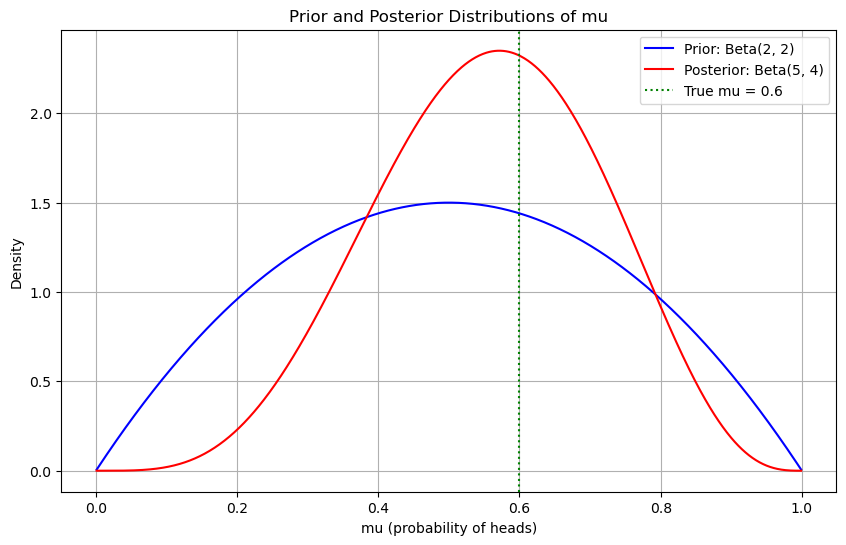


Summary of Results and Visualizations:
• Prior: Beta(2, 2)
• Posterior: Beta(5, 4)
• Plotted prior and posterior distributions of mu


In [1]:
import math
import matplotlib.pyplot as plt
import random

# Set random seed for reproducibility
random.seed(42)

# --- Define the Model ---
N = 5  # Number of coin flips
alpha, beta = 2, 2  # Hyperparameters for Beta prior on mu

# Generate synthetic data for x_n (coin flips)
def generate_coin_flips(N, true_mu):
    """Generate N coin flips with probability mu."""
    return [1 if random.random() < true_mu else 0 for _ in range(N)]

true_mu = 0.6  # True probability of heads
x = generate_coin_flips(N, true_mu)
print(f"Generated Data: x = {x}")

# --- Beta PDF ---
def beta_pdf(mu, alpha, beta):
    """Compute the PDF of a Beta distribution at mu."""
    if mu <= 0 or mu >= 1:
        return 0
    try:
        log_numerator = (alpha - 1) * math.log(mu) + (beta - 1) * math.log(1 - mu)
        log_denominator = math.lgamma(alpha) + math.lgamma(beta) - math.lgamma(alpha + beta)
        return math.exp(log_numerator - log_denominator)
    except (ValueError, OverflowError):
        return 0

# --- Bernoulli Likelihood ---
def bernoulli_pmf(x, mu):
    """Compute the probability of x under a Bernoulli(mu)."""
    if x not in [0, 1]:
        return 0
    return mu if x == 1 else (1 - mu)

# --- Joint Distribution ---
def compute_joint(mu, x, alpha, beta):
    """
    Compute the joint distribution p(mu, x_1, ..., x_N | alpha, beta).
    Returns p(mu | alpha, beta) * prod_n p(x_n | mu).
    """
    p_mu = beta_pdf(mu, alpha, beta)
    p_x_given_mu = 1.0
    for xn in x:
        p_x_given_mu *= bernoulli_pmf(xn, mu)
    return p_mu * p_x_given_mu

# --- Marginal Likelihood ---
def compute_marginal_likelihood(x, alpha, beta, num_points=1000):
    """
    Numerically compute p(x_1, ..., x_N | alpha, beta) by integrating over mu.
    Uses simple Riemann sum for integration.
    """
    delta_mu = 1.0 / num_points
    mu_values = [i * delta_mu for i in range(1, num_points)]  # Avoid 0 and 1
    integral = 0.0
    for mu in mu_values:
        joint = compute_joint(mu, x, alpha, beta)
        integral += joint * delta_mu
    return integral

# --- Posterior Parameters ---
def compute_posterior_params(x, alpha, beta):
    """Compute the posterior parameters for p(mu | x_1, ..., x_N, alpha, beta)."""
    s = sum(x)  # Number of heads
    f = len(x) - s  # Number of tails
    alpha_post = alpha + s
    beta_post = beta + f
    return alpha_post, beta_post

# --- Main Demonstration ---
def demonstrate_inference():
    """Demonstrate inference in the directed graphical model."""
    print("=== Inference in Directed Graphical Model Demonstration ===")
    print("Section 8.5.3: Inference in Directed Graphical Models\n")
    
    # Step 1: Compute posterior parameters analytically
    print("Computing Posterior Distribution Analytically:")
    alpha_post, beta_post = compute_posterior_params(x, alpha, beta)
    print(f"Prior: Beta({alpha}, {beta})")
    print(f"Posterior: Beta({alpha_post}, {beta_post})")
    
    # Step 2: Compute marginal likelihood numerically
    print("\nComputing Marginal Likelihood Numerically:")
    marginal_likelihood = compute_marginal_likelihood(x, alpha, beta)
    print(f"p(x_1, ..., x_{N} | alpha, beta) = {marginal_likelihood:.6f}")
    
    # Step 3: Verify posterior at a specific mu
    mu_val = 0.6
    joint = compute_joint(mu_val, x, alpha, beta)
    posterior_at_mu = joint / marginal_likelihood if marginal_likelihood > 0 else 0
    expected_posterior = beta_pdf(mu_val, alpha_post, beta_post)
    print(f"\nVerification at mu = {mu_val}:")
    print(f"Computed posterior p(mu={mu_val} | x) = {posterior_at_mu:.6f}")
    print(f"Expected posterior (Beta PDF) = {expected_posterior:.6f}")
    
    return alpha, beta, alpha_post, beta_post

# --- Plotting Function ---
def plot_distributions(alpha_prior, beta_prior, alpha_post, beta_post):
    """Plot the prior and posterior distributions of mu."""
    mu_values = [i / 1000 for i in range(1, 1000)]  # Avoid 0 and 1
    prior = [beta_pdf(mu, alpha_prior, beta_prior) for mu in mu_values]
    posterior = [beta_pdf(mu, alpha_post, beta_post) for mu in mu_values]
    
    plt.figure(figsize=(10, 6))
    plt.plot(mu_values, prior, label=f"Prior: Beta({alpha_prior}, {beta_prior})", color="blue")
    plt.plot(mu_values, posterior, label=f"Posterior: Beta({alpha_post}, {beta_post})", color="red")
    plt.axvline(true_mu, color="green", linestyle=":", label=f"True mu = {true_mu}")
    plt.title("Prior and Posterior Distributions of mu")
    plt.xlabel("mu (probability of heads)")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()

# --- Main Execution ---
if __name__ == "__main__":
    print("Inference Demonstration with Matplotlib Plotting")
    print("=" * 60)

    # Demonstrate inference
    alpha_prior, beta_prior, alpha_post, beta_post = demonstrate_inference()

    # Plot the distributions
    print("\nPlotting Prior and Posterior Distributions")
    plot_distributions(alpha_prior, beta_prior, alpha_post, beta_post)

    print("\n" + "=" * 60)
    print("Summary of Results and Visualizations:")
    print(f"• Prior: Beta({alpha_prior}, {beta_prior})")
    print(f"• Posterior: Beta({alpha_post}, {beta_post})")
    print("• Plotted prior and posterior distributions of mu")

## 8.5.4 Approximate Inference via Sampling

In Section 8.5.3, we discussed exact inference in directed graphical models, computing quantities like marginal probabilities and posteriors by leveraging the graph structure. However, exact inference can become computationally infeasible for large models due to the exponential growth of summations or integrations (e.g., Equation 8.36). In such cases, *approximate inference* methods, such as sampling, provide a practical alternative. Sampling methods approximate probability distributions by generating samples from them, allowing us to estimate probabilities of interest through empirical averages.

One simple sampling technique is *rejection sampling*, which generates samples from a target distribution $p(x)$ by sampling from a proposal distribution $q(x)$ and accepting or rejecting samples based on a criterion. Suppose we wish to sample from $p(x) = \frac{\tilde{p}(x)}{Z}$, where $\tilde{p}(x)$ is the unnormalized distribution (e.g., the numerator of a posterior), and $Z = \int \tilde{p}(x) \, dx$ is the normalizing constant (often hard to compute). Rejection sampling requires a proposal distribution $q(x)$ such that there exists a constant $M$ satisfying:

$$
\tilde{p}(x) \leq M q(x) \quad \text{for all } x, \tag{8.43}
$$

where $M q(x)$ is an envelope over $\tilde{p}(x)$. The algorithm proceeds as follows:

1. Sample $x \sim q(x)$.
2. Sample $u \sim \text{Uniform}(0, 1)$.
3. Accept $x$ if $u \leq \frac{\tilde{p}(x)}{M q(x)}$; otherwise, reject it.

The accepted samples are distributed according to $p(x)$. The acceptance rate depends on how well $q(x)$ approximates $p(x)$—a poor choice of $q(x)$ leads to a high rejection rate, making the method inefficient.

### Example 8.10: Rejection Sampling for the Coin-Flip Posterior

Let’s revisit the coin-flip model from Sections 8.5.1 and 8.5.3 (Figures 8.10(a)–(c)), where $x_1, \ldots, x_N$ are Bernoulli observations with parameter $\mu$, and $\mu$ has a $\text{Beta}(\alpha, \beta)$ prior. We computed the posterior $p(\mu | x_1, \ldots, x_N, \alpha, \beta)$ analytically as a $\text{Beta}(\alpha + s, \beta + f)$ distribution (Equation 8.42). Here, we’ll use rejection sampling to approximate this posterior, treating it as an unnormalized distribution:

$$
\tilde{p}(\mu | x_1, \ldots, x_N, \alpha, \beta) = p(\mu | \alpha, \beta) \prod_{n=1}^N p(x_n | \mu), \tag{8.44}
$$

where $p(\mu | \alpha, \beta) = \text{Beta}(\alpha, \beta)$ and $p(x_n | \mu) = \mu^{x_n} (1 - \mu)^{1 - x_n}$. Since $\mu \in [0, 1]$, a natural choice for the proposal distribution is $q(\mu) = \text{Uniform}(0, 1)$. We need to find $M$ such that:

$$
\tilde{p}(\mu | x_1, \ldots, x_N, \alpha, \beta) \leq M q(\mu) = M \cdot 1 = M, \quad \mu \in [0, 1]. \tag{8.45}
$$

Thus, $M$ must be the maximum of $\tilde{p}(\mu | x_1, \ldots, x_N, \alpha, \beta)$ over $\mu \in [0, 1]$. We can approximate this by evaluating $\tilde{p}$ at a fine grid of $\mu$ values and taking the maximum.

After generating samples from the posterior, we can estimate quantities like the posterior mean of $\mu$:

$$
\mathbb{E}[\mu | x_1, \ldots, x_N, \alpha, \beta] \approx \frac{1}{S} \sum_{s=1}^S \mu^{(s)}, \tag{8.46}
$$

where $\mu^{(s)}$ are the accepted samples, and $S$ is the number of samples.

### Limitations and Alternatives

Rejection sampling can be inefficient if the proposal $q(x)$ poorly matches the target $p(x)$, leading to a low acceptance rate. In high-dimensional spaces, finding a suitable $q(x)$ and $M$ becomes challenging. Alternatives like Markov Chain Monte Carlo (MCMC) methods, such as the Metropolis-Hastings algorithm, or importance sampling, often scale better and are widely used in practice (MacKay, 2003; Bishop, 2006). We will explore these methods in Chapter 9.

In the next section, we will discuss undirected graphical models, which offer an alternative representation for probabilistic models and are particularly useful in fields like statistical physics and computer vision.



Generated Data: x = [0, 1, 1, 1, 0]
Rejection Sampling Demonstration with Matplotlib Plotting
=== Approximate Inference via Rejection Sampling Demonstration ===
Section 8.5.4: Approximate Inference via Sampling

Analytical Posterior:
Prior: Beta(2, 2)
Posterior: Beta(5, 4)
Analytical posterior mean of mu: 0.556

Finding M for Rejection Sampling:
M = 0.050861

Performing Rejection Sampling:
Number of samples: 5000
Acceptance rate: 0.424

Estimated posterior mean of mu: 0.558
Error in mean estimation: 0.003

Plotting Results


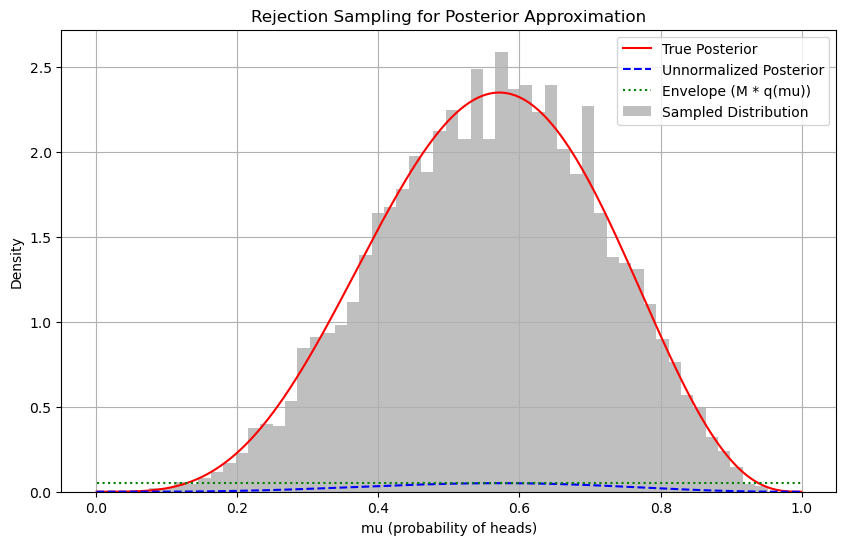


Summary of Results and Visualizations:
• Analytical Posterior: Beta(5, 4)
• Generated 5000 samples via rejection sampling
• Plotted true posterior, unnormalized posterior, envelope, and sampled distribution


In [2]:
import math
import matplotlib.pyplot as plt
import random

# Set random seed for reproducibility
random.seed(42)

# --- Define the Model ---
N = 5  # Number of coin flips
alpha, beta = 2, 2  # Hyperparameters for Beta prior on mu

# Generate synthetic data for x_n (coin flips)
def generate_coin_flips(N, true_mu):
    """Generate N coin flips with probability mu."""
    return [1 if random.random() < true_mu else 0 for _ in range(N)]

true_mu = 0.6  # True probability of heads
x = generate_coin_flips(N, true_mu)
print(f"Generated Data: x = {x}")

# --- Beta PDF ---
def beta_pdf(mu, alpha, beta):
    """Compute the PDF of a Beta distribution at mu."""
    if mu <= 0 or mu >= 1:
        return 0
    try:
        log_numerator = (alpha - 1) * math.log(mu) + (beta - 1) * math.log(1 - mu)
        log_denominator = math.lgamma(alpha) + math.lgamma(beta) - math.lgamma(alpha + beta)
        return math.exp(log_numerator - log_denominator)
    except (ValueError, OverflowError):
        return 0

# --- Bernoulli Likelihood ---
def bernoulli_pmf(x, mu):
    """Compute the probability of x under a Bernoulli(mu)."""
    if x not in [0, 1]:
        return 0
    return mu if x == 1 else (1 - mu)

# --- Unnormalized Posterior ---
def unnormalized_posterior(mu, x, alpha, beta):
    """
    Compute the unnormalized posterior tilde{p}(mu | x_1, ..., x_N, alpha, beta).
    Returns p(mu | alpha, beta) * prod_n p(x_n | mu).
    """
    p_mu = beta_pdf(mu, alpha, beta)
    p_x_given_mu = 1.0
    for xn in x:
        p_x_given_mu *= bernoulli_pmf(xn, mu)
    return p_mu * p_x_given_mu

# --- Find M for Rejection Sampling ---
def find_M(x, alpha, beta, num_points=1000):
    """Approximate M as the maximum of the unnormalized posterior over mu in [0, 1]."""
    mu_values = [i / num_points for i in range(1, num_points)]  # Avoid 0 and 1
    unnormalized_values = [unnormalized_posterior(mu, x, alpha, beta) for mu in mu_values]
    M = max(unnormalized_values) * 1.01  # Add a small margin for safety
    return M

# --- Rejection Sampling ---
def rejection_sampling(x, alpha, beta, M, num_samples=10000):
    """
    Perform rejection sampling to sample from p(mu | x_1, ..., x_N, alpha, beta).
    Proposal distribution: q(mu) = Uniform(0, 1).
    """
    accepted_samples = []
    total_attempts = 0
    q_mu = 1.0  # PDF of Uniform(0, 1)
    
    while len(accepted_samples) < num_samples:
        # Step 1: Sample mu from q(mu)
        mu = random.uniform(0, 1)
        
        # Step 2: Sample u from Uniform(0, 1)
        u = random.uniform(0, 1)
        
        # Step 3: Compute acceptance ratio
        p_tilde = unnormalized_posterior(mu, x, alpha, beta)
        acceptance_ratio = p_tilde / (M * q_mu)
        
        # Step 4: Accept or reject
        if u <= acceptance_ratio:
            accepted_samples.append(mu)
        total_attempts += 1
    
    acceptance_rate = len(accepted_samples) / total_attempts
    return accepted_samples, acceptance_rate

# --- Posterior Parameters (Analytical) ---
def compute_posterior_params(x, alpha, beta):
    """Compute the analytical posterior parameters for p(mu | x_1, ..., x_N, alpha, beta)."""
    s = sum(x)  # Number of heads
    f = len(x) - s  # Number of tails
    alpha_post = alpha + s
    beta_post = beta + f
    return alpha_post, beta_post

# --- Main Demonstration ---
def demonstrate_rejection_sampling(num_samples=5000):
    """Demonstrate rejection sampling for approximate inference."""
    print("=== Approximate Inference via Rejection Sampling Demonstration ===")
    print("Section 8.5.4: Approximate Inference via Sampling\n")
    
    # Step 1: Compute analytical posterior for comparison
    print("Analytical Posterior:")
    alpha_post, beta_post = compute_posterior_params(x, alpha, beta)
    print(f"Prior: Beta({alpha}, {beta})")
    print(f"Posterior: Beta({alpha_post}, {beta_post})")
    analytical_mean = alpha_post / (alpha_post + beta_post)
    print(f"Analytical posterior mean of mu: {analytical_mean:.3f}")
    
    # Step 2: Find M for rejection sampling
    print("\nFinding M for Rejection Sampling:")
    M = find_M(x, alpha, beta)
    print(f"M = {M:.6f}")
    
    # Step 3: Perform rejection sampling
    print("\nPerforming Rejection Sampling:")
    samples, acceptance_rate = rejection_sampling(x, alpha, beta, M, num_samples)
    print(f"Number of samples: {len(samples)}")
    print(f"Acceptance rate: {acceptance_rate:.3f}")
    
    # Step 4: Estimate posterior mean
    estimated_mean = sum(samples) / len(samples)
    print(f"\nEstimated posterior mean of mu: {estimated_mean:.3f}")
    print(f"Error in mean estimation: {abs(estimated_mean - analytical_mean):.3f}")
    
    return samples, M, alpha_post, beta_post

# --- Plotting Function ---
def plot_results(samples, M, alpha_post, beta_post):
    """Plot the true posterior, proposal envelope, and sampled distribution."""
    mu_values = [i / 1000 for i in range(1, 1000)]  # Avoid 0 and 1
    true_posterior = [beta_pdf(mu, alpha_post, beta_post) for mu in mu_values]
    unnormalized = [unnormalized_posterior(mu, x, alpha, beta) for mu in mu_values]
    envelope = [M for _ in mu_values]  # M * q(mu) = M * 1
    
    plt.figure(figsize=(10, 6))
    plt.plot(mu_values, true_posterior, label="True Posterior", color="red")
    plt.plot(mu_values, unnormalized, label="Unnormalized Posterior", color="blue", linestyle="--")
    plt.plot(mu_values, envelope, label=f"Envelope (M * q(mu))", color="green", linestyle=":")
    plt.hist(samples, bins=50, density=True, alpha=0.5, color="gray", label="Sampled Distribution")
    plt.title("Rejection Sampling for Posterior Approximation")
    plt.xlabel("mu (probability of heads)")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()

# --- Main Execution ---
if __name__ == "__main__":
    print("Rejection Sampling Demonstration with Matplotlib Plotting")
    print("=" * 60)

    # Demonstrate rejection sampling
    samples, M, alpha_post, beta_post = demonstrate_rejection_sampling()

    # Plot the results
    print("\nPlotting Results")
    plot_results(samples, M, alpha_post, beta_post)

    print("\n" + "=" * 60)
    print("Summary of Results and Visualizations:")
    print(f"• Analytical Posterior: Beta({alpha_post}, {beta_post})")
    print(f"• Generated {len(samples)} samples via rejection sampling")
    print("• Plotted true posterior, unnormalized posterior, envelope, and sampled distribution")

##  Undirected Graphical Models

In the previous sections, we explored directed graphical models (Bayesian networks), which represent the joint distribution of a set of random variables as a product of conditional probabilities based on a directed acyclic graph (DAG). Directed models are particularly intuitive when the dependencies between variables have a clear causal or hierarchical structure, such as in the coin-flip example (Section 8.5.1). However, not all probabilistic models naturally exhibit directed dependencies. In this section, we introduce *undirected graphical models*, also known as Markov Random Fields (MRFs), which provide an alternative representation where dependencies are symmetric and lack a directional interpretation.

### Graph Semantics

In an undirected graphical model, nodes still represent random variables, but edges are undirected, indicating mutual dependencies between variables

## 8.5.6 Inference in Undirected Graphical Models

In Section 8.5.5, we introduced undirected graphical models (Markov Random Fields) and showed how their joint distribution factorizes over maximal cliques as:

$$
p(\mathbf{x}) = \frac{1}{Z} \prod_{C \in \mathcal{C}} \psi_C(\mathbf{x}_C), \tag{8.49}
$$

where $\mathcal{C}$ is the set of maximal cliques, $\psi_C(\mathbf{x}_C)$ are potential functions, and $Z$ is the partition function (Equation 8.47). Inference in undirected models involves computing probabilities of interest, such as marginal probabilities $p(x_i)$ or conditional probabilities $p(x_i | \mathbf{e})$, where $\mathbf{e}$ represents observed evidence. Unlike directed models, where conditional independence can simplify computations (via d-separation), undirected models require us to deal with the global normalization constant $Z$, which often makes inference computationally challenging.

### Exact Inference via Enumeration

One straightforward approach to inference is *exact enumeration*, where we compute the joint distribution explicitly and sum over variables as needed. For example, to compute the marginal $p(x_i)$, we sum over all other variables:

$$
p(x_i) = \sum_{\mathbf{x} \setminus x_i\}} p(\mathbf{x}), \tag{8.50}
$$

This requires computing $p(\mathbf{x})$ for all configurations, which involves calculating $Z$:

$$
Z = \sum_{\mathbf{x}} \prod_{C \in \mathcal{C}} \psi_C(\mathbf{x}_C), \tag{8.1}
$$

For a model with $K$ binary variables, this summation involves $2^K$ configurations, making exact enumeration computationally infeasible for large graphs.

#### Example 12: Exact Inference in the Chain Model

Let’s revisit the undirected model from Example 8. Section 11 (Section 8.5.5), with variables $x_1, x_2, x_3$ forming a chain \( x_1 - x_2 - x_3 \), and joint distribution:

$$
p(x_1, x_2, x_3) = \frac{1}{Z} \psi_{1,2}(x_1, x_2) \psi_{2, x_3}(x_2, x_3), \tag{8.52}
$$

where $\psi_{1,2}(x_1, x_2) = \exp(-|x_{1} - x_1 2}|)$ and $\psi_{2,3}(x_2, x_3) = \exp(-|x_2 - x_3|)$, and $ x_1, x_2, x_3 $ are binary. We already computed the joint distribution and partition function $ Z $ in the previous section. Now let’s compute the marginal probability $ p(x_2) $:

$$
p(x_2) = \sum_{x_1, x_3} p(x_1, x_2, x_3) = \sum_{x_1, x_3} \frac{1}{Z} \psi_{1,2}(x_1, x_2) \psi_{2,3}(x_2, x_3). \tag{8.53}
$$

Since each variable is binary, we sum over the four configurations of $ (x_1, x_3) $. This computation, while feasible for this small graph, highlights the challenge of scaling to larger models where the number of configurations grows exponentially.

### Conditional Independence in Undirected Models

Undirected models also encode conditional independence, but the interpretation differs from directed models. In an undirected graph, two sets of nodes $A$ and $B$ are *conditionally independent* given a set $C$ (denoted $A \perp \perp B | C$) if all paths between $A$ and $B$ pass through $C$. This is known as the *global Markov property*. For example, in the chain $ x_1 - x_2 - x_3 $, $x_1$ and $x_3$ are conditionally independent given $x_2$:

$$
x_1 \perp \perp x_3 | x_2, \tag{8.54}
$$

because the only path between $x_1$ and $x_3$ passes through $x_2$. This property can simplify inference by reducing the number of variables we need to consider in certain computations.

### Challenges and Approximate Inference

The primary challenge in undirected models is computing the partition function $Z$, which requires summing over all configurations of $\mathbf{x}$. For large or densely connected graphs, this becomes intractable. Additionally, even if $Z$ is computed, marginalization over many variables (as in Equation 8.50) can be expensive. In practice, approximate inference methods, such as the sampling techniques introduced in Section 8.5.4 (e.g., rejection sampling), are often employed. More advanced methods, like belief propagation and variational inference, exploit the graph structure to make inference tractable (Koller and Friedman, 2009). These will be explored in Chapter 9.

In the next section, we will discuss learning in graphical models, focusing on how to estimate parameters or structures from data.

Undirected Graphical Model Demonstration with Matplotlib Plotting
=== Undirected Graphical Model Demonstration ===
Section 8.5.5: Undirected Graphical Models

Computing Partition Function Z:
Z = 3.742

Joint Distribution p(x_1, x_2, x_3):
p(x_1=0, x_2=0, x_3=0) = 0.267
p(x_1=0, x_2=0, x_3=1) = 0.098
p(x_1=0, x_2=1, x_3=0) = 0.036
p(x_1=0, x_2=1, x_3=1) = 0.098
p(x_1=1, x_2=0, x_3=0) = 0.098
p(x_1=1, x_2=0, x_3=1) = 0.036
p(x_1=1, x_2=1, x_3=0) = 0.098
p(x_1=1, x_2=1, x_3=1) = 0.267

Marginal Probability p(x_1):
p(x_1=0) = 0.500
p(x_1=1) = 0.500

Plotting Undirected Graphical Model


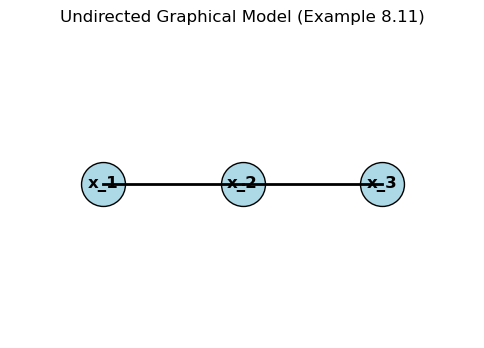


Summary of Results and Visualizations:
• Partition Function: Z = 3.742
• Marginal p(x_1=0) = 0.500, p(x_1=1) = 0.500
• Plotted the undirected graphical model with chain structure x_1 - x_2 - x_3


In [3]:
import math
import matplotlib.pyplot as plt

# --- Define the Undirected Graphical Model ---
# Variables x_1, x_2, x_3 are binary (0 or 1)
# Potential functions encourage agreement between neighbors
def psi(x_i, x_j):
    """Potential function psi(x_i, x_j) = exp(-|x_i - x_j|)."""
    return math.exp(-abs(x_i - x_j))

# --- Compute Unnormalized Joint ---
def unnormalized_joint(x1, x2, x3):
    """
    Compute the unnormalized joint distribution.
    tilde{p}(x_1, x_2, x_3) = psi_{1,2}(x_1, x_2) * psi_{2,3}(x_2, x_3)
    """
    return psi(x1, x2) * psi(x2, x3)

# --- Compute Partition Function Z ---
def compute_partition_function():
    """
    Compute Z = sum_{x_1, x_2, x_3} tilde{p}(x_1, x_2, x_3).
    Since variables are binary, sum over all configurations.
    """
    Z = 0.0
    for x1 in [0, 1]:
        for x2 in [0, 1]:
            for x3 in [0, 1]:
                Z += unnormalized_joint(x1, x2, x3)
    return Z

# --- Compute Joint Distribution ---
def joint_distribution(x1, x2, x3, Z):
    """Compute the normalized joint distribution p(x_1, x_2, x_3)."""
    return unnormalized_joint(x1, x2, x3) / Z if Z > 0 else 0

# --- Compute Marginal Probability ---
def compute_marginal_p_x1(Z):
    """
    Compute the marginal p(x_1) by summing over x_2 and x_3.
    p(x_1) = sum_{x_2, x_3} p(x_1, x_2, x_3)
    """
    p_x1 = {0: 0.0, 1: 0.0}
    for x1 in [0, 1]:
        for x2 in [0, 1]:
            for x3 in [0, 1]:
                p_x1[x1] += joint_distribution(x1, x2, x3, Z)
    return p_x1

# --- Main Demonstration ---
def demonstrate_undirected_graphical_model():
    """Demonstrate the undirected graphical model from Example 8.11."""
    print("=== Undirected Graphical Model Demonstration ===")
    print("Section 8.5.5: Undirected Graphical Models\n")
    
    # Step 1: Compute the partition function
    print("Computing Partition Function Z:")
    Z = compute_partition_function()
    print(f"Z = {Z:.3f}")
    
    # Step 2: Compute and display joint distribution
    print("\nJoint Distribution p(x_1, x_2, x_3):")
    for x1 in [0, 1]:
        for x2 in [0, 1]:
            for x3 in [0, 1]:
                p = joint_distribution(x1, x2, x3, Z)
                print(f"p(x_1={x1}, x_2={x2}, x_3={x3}) = {p:.3f}")
    
    # Step 3: Compute marginal p(x_1)
    print("\nMarginal Probability p(x_1):")
    p_x1 = compute_marginal_p_x1(Z)
    for x1 in [0, 1]:
        print(f"p(x_1={x1}) = {p_x1[x1]:.3f}")
    
    return Z, p_x1

# --- Plotting Function ---
def plot_undirected_graph():
    """Plot the undirected graphical model using Matplotlib."""
    fig, ax = plt.subplots(figsize=(6, 4))
    
    # Define node positions
    positions = {
        'x_1': (0.2, 0.5),
        'x_2': (0.5, 0.5),
        'x_3': (0.8, 0.5),
    }
    
    # Draw nodes
    for node, (x, y) in positions.items():
        ax.scatter(x, y, s=1000, color='lightblue', edgecolors='black')
        ax.text(x, y, node, ha='center', va='center', fontsize=12, fontweight='bold')
    
    # Draw undirected edges
    edges = [('x_1', 'x_2'), ('x_2', 'x_3')]
    for node1, node2 in edges:
        x1, y1 = positions[node1]
        x2, y2 = positions[node2]
        ax.plot([x1, x2], [y1, y2], color='black', linewidth=2)
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_axis_off()
    plt.title("Undirected Graphical Model (Example 8.11)")
    plt.show()

# --- Main Execution ---
if __name__ == "__main__":
    print("Undirected Graphical Model Demonstration with Matplotlib Plotting")
    print("=" * 60)

    # Demonstrate the model
    Z, p_x1 = demonstrate_undirected_graphical_model()

    # Plot the graph
    print("\nPlotting Undirected Graphical Model")
    plot_undirected_graph()

    print("\n" + "=" * 60)
    print("Summary of Results and Visualizations:")
    print(f"• Partition Function: Z = {Z:.3f}")
    print(f"• Marginal p(x_1=0) = {p_x1[0]:.3f}, p(x_1=1) = {p_x1[1]:.3f}")
    print("• Plotted the undirected graphical model with chain structure x_1 - x_2 - x_3")